In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials,SpotifyOAuth
import sys
import os
from IPython.core.interactiveshell import InteractiveShell
import time

In [3]:
#import logging
#logging.basicConfig(level = "DEBUG")

In [4]:
InteractiveShell.ast_node_interactivity = "all"
np.set_printoptions(threshold=sys.maxsize)
pd.set_option("display.max_columns",500)
pd.set_option("display.min_rows",500)

In [5]:
os.chdir(os.path.join(os.path.expanduser("~"),"Desktop"))
import auth

In [6]:
my_color = {"light_blue":"#7FB3D5"}

In [7]:
sp = spotipy.Spotify(client_credentials_manager= SpotifyClientCredentials(client_id = auth.client_id, client_secret = auth.client_secret),
auth_manager = SpotifyOAuth(client_id = auth.client_id, client_secret = auth.client_secret,redirect_uri = auth.redirect_url))

In [7]:
#sp.current_user_playing_track()["item"]["uri"]

In [8]:
#sp.current_user_playing_track()["item"]["album"]["uri"]

In [9]:
#Define a finction to create the feature for a specfic artists(album features,track_features,audio_features) Album not 单曲 (limit <= 50)
def create_feature(artist,type_al = "album",limit = 50,offset = 0):
    #if limit <= 0 or limit > 50:
      #  limit = 50
      #  if limit > 50:
      #      add_on = limit-50  
      # TODO: Better control when limit is greater than the maximum limit 50.


    album_list = []
    albums = sp.search(q = "artist:"+artist,limit = limit,offset = offset,type = "album")
    artist_uri = albums["albums"]["items"][0]["artists"][0]["uri"]
    albums= sp.artist_albums(artist_uri,album_type = type_al,limit = limit,offset = offset)
    count = 0
    min_time,max_time = 2,5
    start_time = time.time()
    for i in range(len(albums["items"])):
        if albums["items"][i]["album_type"] == type_al:
            count += 1
            album0 = {}
            album0["artist_name"] = albums["items"][i]["artists"][0]["name"]
            album0["artist_uri"] = albums["items"][i]["artists"][0]["uri"]
            album0["album_name"] = albums["items"][i]["name"]
            album0["album_uri"] = albums["items"][i]["uri"]
            album0["album_market"] = ",".join(albums["items"][i]["available_markets"])
            album0["album_release_date"] = albums["items"][i]["release_date"]
            album0["total_tracks"]  = albums["items"][i]["total_tracks"]
            album0["album_type"] = albums["items"][i]["type"]
            #Create empty features
            album0["track_name"] = []
            album0["track_uri"] = []
            album0["track_number"]  = []
            album0["duration_ms"] = []
            album0["track_market"] = []
            album0["popularity"] = []
            album0["track_type"] = []
            album0["danceability"] = []
            album0["energy"] = []
            album0["key"] = []
            album0["loudness"] = []
            album0["mode"] = []
            album0["speechiness"] = []
            album0["acousticness"] = []
            album0["instrumentalness"] = []
            album0["liveness"] = []
            album0["valence"] = []
            album0["tempo"] = []
            album0["time_signature"] = []
            tracks = sp.album(album0["album_uri"])
            #50 tracks at maximum
            if album0["total_tracks"] > 50:
                tracks_add = sp.album_tracks(album0["album_uri"],offset = 50)
                add_len = len(tracks_add["items"])
            else:
                add_len = 0
            for j in range(len(tracks["tracks"]["items"])):
                album0["track_name"].append(tracks["tracks"]["items"][j]["name"])
                album0["track_uri"] .append(tracks["tracks"]["items"][j]["uri"])
             #dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
                album0["track_number"].append(tracks["tracks"]["items"][j]["track_number"])
                album0["track_type"].append(tracks["tracks"]["items"][j]["type"])
                album0["duration_ms"].append(tracks["tracks"]["items"][j]["duration_ms"])
                album0["track_market"].append(",".join(tracks["tracks"]["items"][j]["available_markets"]))
                track_feature = sp.track(tracks["tracks"]["items"][j]["uri"])
                album0["popularity"].append(track_feature["popularity"])
                features = sp.audio_features(tracks["tracks"]["items"][j]["uri"])
                album0["danceability"].append(features[0]["danceability"])
                album0["energy"].append(features[0]["energy"])
                album0["key"].append(features[0]["key"])
                album0["loudness"].append(features[0]["loudness"])
                album0["mode"].append(features[0]["mode"])
                album0["speechiness"].append(features[0]["speechiness"])
                album0["acousticness"].append(features[0]["acousticness"])
                album0["instrumentalness"].append(features[0]["instrumentalness"])
                album0["liveness"].append(features[0]["liveness"])
                album0["valence"].append(features[0]["valence"])
                album0["tempo"].append(features[0]["tempo"])
                album0["time_signature"].append(features[0]["time_signature"])
            if add_len!=0:
                for j in range(len(tracks_add["items"])):
                    album0["track_name"].append(tracks_add["items"][j]["name"])
                    album0["track_uri"] .append(tracks_add["items"][j]["uri"])
                    album0["track_number"].append(tracks_add["items"][j]["track_number"])
                    album0["track_type"].append(tracks_add["items"][j]["type"])
                    album0["duration_ms"].append(tracks_add["items"][j]["duration_ms"])
                    album0["track_market"].append(",".join(tracks_add["items"][j]["available_markets"]))
                    track_feature = sp.track(tracks_add["items"][j]["uri"])
                    features = sp.audio_features(tracks_add["items"][j]["uri"])
                    album0["popularity"].append(track_feature["popularity"])
                    album0["danceability"].append(features[0]["danceability"])
                    album0["energy"].append(features[0]["energy"])
                    album0["key"].append(features[0]["key"])
                    album0["loudness"].append(features[0]["loudness"])
                    album0["mode"].append(features[0]["mode"])
                    album0["speechiness"].append(features[0]["speechiness"])
                    album0["acousticness"].append(features[0]["acousticness"])
                    album0["instrumentalness"].append(features[0]["instrumentalness"])
                    album0["liveness"].append(features[0]["liveness"])
                    album0["valence"].append(features[0]["valence"])
                    album0["tempo"].append(features[0]["tempo"])
                    album0["time_signature"].append(features[0]["time_signature"])
            album0_df = pd.DataFrame.from_dict(album0)
            if count%5 == 0:
                print("%d playlists finished!" %count)
                time.sleep(np.random.uniform(min_time,max_time)) #Let the spotify API sleeps for a while
                elapsed_time = time.time()-start_time
                print("Elapsed time: {}".format(elapsed_time))
            album_list.append(album0_df)
    return pd.concat(album_list)


In [10]:
#Sodagreen
sample = create_feature(artist = "Sodagreen")

5 playlists finished!
Elapsed time: 24.581726789474487
10 playlists finished!
Elapsed time: 49.59705948829651


In [37]:
sample.groupby(["album_name","album_uri"]).size().reset_index(name = "count").sort_values("count",ascending = False).head(5)

,album_name,album_uri,count
6,秋:故事,spotify:album:3THCn447cIVJjLYou7MHV6,16
10,陪我歌唱 (Live),spotify:album:4480TpTTIHEitIZa8TFG2i,16
1,十年一刻,spotify:album:5BnbpihEjEf9ZDNKhJwRBL,14
2,夏 / 狂熱,spotify:album:7iRBwwZ1BSFAyxDgvmz7fZ,14
9,蘇打綠故事未了音樂電影 (Endless Story Live),spotify:album:2IEE77dKyPnccUlhUNtK3S,13


In [12]:
assert(sample.groupby("album_name").size().reset_index(name = "count").sort_values("album_name")["count"].tolist() == sample[["album_name","total_tracks"]].drop_duplicates().sort_values("album_name")["total_tracks"].tolist())

In [13]:
#Jay chou
sample2 = create_feature(artist = "Jay Chou")

5 playlists finished!
Elapsed time: 23.847947597503662
10 playlists finished!
Elapsed time: 42.998899936676025
15 playlists finished!
Elapsed time: 56.19013476371765
20 playlists finished!
Elapsed time: 69.75580787658691
25 playlists finished!
Elapsed time: 89.49025201797485
30 playlists finished!
Elapsed time: 113.84865164756775
35 playlists finished!
Elapsed time: 129.5828652381897
40 playlists finished!
Elapsed time: 143.0592920780182


In [38]:
sample2.groupby(["album_name","album_uri"]).size().reset_index(name = "count").sort_values("count",ascending = False).head(5)

,album_name,album_uri,count
5,《天台》電影原聲帶,spotify:album:2afPHXn7m4KQECRsVn41us,34
18,周杰倫地表最強世界巡迴演唱會,spotify:album:5lqE2qT3nGLW6FGoJYfwUT,25
2,2004無與倫比演唱會,spotify:album:3cpkhODgoYVZGWMMLqOeed,25
15,周杰倫2004無與倫比演唱會,spotify:album:2GnsBsZ13FQvBp4LPf879L,25
19,周杰倫地表最強世界巡迴演唱會 (Live),spotify:album:3mqG5FjCm7XuCx5IHN3ZSg,25


In [21]:
assert(sample2.groupby("album_uri").size().reset_index(name = "count").sort_values("album_uri")["count"].tolist() == sample2[["album_uri","total_tracks"]].drop_duplicates().sort_values("album_uri")["total_tracks"].tolist())

In [22]:
#Coldplay
sample3 = create_feature(artist = "Coldplay")

5 playlists finished!
Elapsed time: 23.21402382850647
10 playlists finished!
Elapsed time: 39.72700619697571
15 playlists finished!
Elapsed time: 56.32206344604492
20 playlists finished!
Elapsed time: 71.45802068710327
25 playlists finished!
Elapsed time: 85.76552486419678


In [39]:
sample3.groupby(["album_name","album_uri"]).size().reset_index(name = "count").sort_values("count",ascending = False).head(5)

,album_name,album_uri,count
9,Live in Buenos Aires,spotify:album:19CvkGjYpifkdwgVJSbog2,24
1,A Head Full of Dreams Tour Edition,spotify:album:5IDGBfcVjwMoGPKOsfyXLN,19
15,Viva La Vida (Prospekt's March Edition),spotify:album:1MnAljVs4hcGU6pTcK2jdT,18
19,Viva La Vida (Prospekt's March Edition),spotify:album:71pRFAwHBLrjKYRG7V1Q2o,18
18,Viva La Vida (Prospekt's March Edition),spotify:album:6JlhIoegCcjtdbTQbypS8R,18


In [41]:
assert(sample3.groupby("album_uri").size().reset_index(name = "count").sort_values("album_uri")["count"].tolist() == sample3[["album_uri","total_tracks"]].drop_duplicates().sort_values("album_uri")["total_tracks"].tolist())

In [21]:
#sample3_2 = create_feature(artist = "Coldplay", offset = 50) #There are additional ablbums for Coldplay

In [33]:
sample4 = create_feature(artist  = "Joey Yung")

5 playlists finished!
Elapsed time: 32.8863091468811
10 playlists finished!
Elapsed time: 58.289655447006226
15 playlists finished!
Elapsed time: 81.80824518203735
20 playlists finished!
Elapsed time: 100.48670744895935
25 playlists finished!
Elapsed time: 117.75598073005676
30 playlists finished!
Elapsed time: 138.727037191391
35 playlists finished!
Elapsed time: 157.20307993888855
40 playlists finished!
Elapsed time: 171.99119997024536
45 playlists finished!
Elapsed time: 188.99545574188232


In [42]:
sample4.groupby(["album_uri","album_name"]).size().reset_index(name = "count").sort_values("count",ascending = False).head(5)

,album_uri,album_name,count
23,spotify:album:3Dc8vyw8nSjhOyZkNzExqc,Joey Yung X Hacken Lee Concert 2015 (Live),55
18,spotify:album:2iRFzWNrrMfUI1X9f5Ozwa,Joey • My Secret • Live,41
39,spotify:album:6mQVSrpkPcHGA0WaNUaWv9,1314 容祖兒演唱會,39
36,spotify:album:5YKPJa7K3n7TtLZHvr3UkB,Hopelessly Romantic Collection,35
19,spotify:album:2iSlwjxrjnnEFLgO9rAtbN,All Delicious Collection,34


In [43]:
assert(sample4.groupby("album_name").size().reset_index(name = "count").sort_values("album_name")["count"].tolist() == sample4[["album_name","total_tracks"]].drop_duplicates().sort_values("album_name")["total_tracks"].tolist())

In [8]:
os.chdir(".\Learning")

In [10]:
sample.to_csv("sodagreen.csv",index = False)

In [51]:
sample2.to_csv("jay.csv",index = False)

In [50]:
sample3.to_csv("coldplay.csv",index = False)

In [49]:
sample4.to_csv("yung.csv",index = False)

In [11]:
#Load the saved data
sodagreen = pd.read_csv("sodagreen.csv")
jay = pd.read_csv("jay.csv")
coldplay = pd.read_csv("coldplay.csv")
yung = pd.read_csv("yung.csv")

In [12]:
sodagreen["album_release_date"] = pd.to_datetime(sodagreen["album_release_date"],format = "%Y-%m-%d")
jay["album_release_date"] = pd.to_datetime(jay["album_release_date"],format = "%Y-%m-%d")
coldplay["album_release_date"] = pd.to_datetime(coldplay["album_release_date"],format = "%Y-%m-%d")
yung["album_release_date"] = pd.to_datetime(yung["album_release_date"],format = "%Y-%m-%d")

In [13]:
len(sodagreen["track_name"].unique().tolist()) #128 unique songs
len(jay["track_name"].unique().tolist()) #331 unque songs
len(coldplay["track_name"].unique().tolist()) #162 unique songs
len(yung["track_name"].unique().tolist())# 551 unique songs

128

331

162

551

In [14]:
jay.groupby("album_name")["album_uri"].nunique().reset_index(name = "count").sort_values("count",ascending = False).head(10)

,album_name,count
0,11月的蕭邦,2
11,周杰倫2007世界巡迴演唱會,2
24,驚嘆號,2
23,跨時代,2
22,超時代演唱會,2
21,葉惠美,2
20,范特西,2
18,我很忙,2
14,周杰倫的床邊故事,2
26,魔杰座,2


In [15]:
jay.groupby(["album_name","album_uri"])["track_name"].nunique().reset_index(name = "count").sort_values(["album_name","album_uri"],ascending = False).head(10)

,album_name,album_uri,count
40,魔杰座,spotify:album:6pmapc89HjY4f16ARzrmBB,11
39,魔杰座,spotify:album:2SrwWoOk7egNTcaJcb4tuO,11
38,魔天倫世界巡迴演唱會,spotify:album:0AMaK4fzYnhvi4HTNVvKet,22
37,驚嘆號,spotify:album:6Py0A0ft3OlxvS6FgVvdJN,11
36,驚嘆號,spotify:album:2P1g6pMd57brcxfpBcb1cM,11
35,跨時代,spotify:album:7oz7WhrdSfsC3GkAUPOzgL,11
34,跨時代,spotify:album:4cj9Li1HSSvRGEXsDU46dS,11
33,超時代演唱會,spotify:album:77IElSKPvc2zdOh46FZgbe,24
32,超時代演唱會,spotify:album:2kMP7E1hqEbZekixQBMiPg,24
31,葉惠美,spotify:album:41FqSrFn288xsdvADjJGxH,11


In [16]:
#sp.album_tracks("spotify:album:6pmapc89HjY4f16ARzrmBB")["items"][0]["name"]

In [17]:
sodagreen["year"]  = sodagreen["album_release_date"].dt.year
sodagreen["month"] = sodagreen["album_release_date"].dt.month
sodagreen["day"] = sodagreen["album_release_date"].dt.day
jay["year"] = jay["album_release_date"].dt.year
jay["month"] = jay["album_release_date"].dt.month
jay["day"] = jay["album_release_date"].dt.day
coldplay["year"] = coldplay["album_release_date"].dt.year
coldplay["month"] = coldplay["album_release_date"].dt.month
coldplay["day"] = coldplay["album_release_date"].dt.day

In [18]:
print("The total number of albums for Sodagreen is: {:d}".format(len(sodagreen["album_name"].unique().tolist()))) #11
print("The total number of albums for Jay Chou is: {:d}".format(len(jay["album_name"].unique().tolist()))) #27 
print("The total number of albums for Coldplay is: {:d}".format(len(coldplay["album_name"].unique().tolist()))) #13 
print("The total number of albums for Joey Yung is: {:d}".format(len(yung["album_name"].unique().tolist()))) #46 

The total number of albums for Sodagreen is: 11
The total number of albums for Jay Chou is: 27
The total number of albums for Coldplay is: 13
The total number of albums for Joey Yung is: 46


In [20]:
coldplay[(coldplay["album_name"] == "Everyday Life")&(coldplay["album_market"] == 'AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HR,HU,ID,IE,IL,IN,IS,IT,JO,KW,KZ,LB,LI,LT,LU,LV,MA,MC,MD,ME,MK,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,RS,RU,SA,SE,SG,SI,SK,SV,TH,TN,TR,TW,UA,US,UY,VN,XK,ZA')&(coldplay["track_name"] == "Everyday Life")] #same track can have different tracck uri and hence different track popularity.

,artist_name,artist_uri,album_name,album_uri,album_market,album_release_date,total_tracks,album_type,track_name,track_uri,track_number,duration_ms,track_market,popularity,track_type,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month,day
32,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,Everyday Life,spotify:album:2FeyIYDDAQqcOJKOKhvHdr,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,C...",2019-11-22,16,album,Everyday Life,spotify:track:0h9fnCSnbUgOEgibnQByFv,8,258533,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,C...",68,track,0.512,0.453,2,-8.991,1,0.0291,0.771,0.0914,0.065,0.236,124.05,4,2019,11,22
65,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,Everyday Life,spotify:album:4dBp8rzdqH9unSndGk6g6o,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,C...",2019-11-22,16,album,Everyday Life,spotify:track:3l80ChsWwZKAog5KSmcdIG,8,258533,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,C...",26,track,0.512,0.453,2,-8.991,1,0.0291,0.771,0.0914,0.065,0.236,124.05,4,2019,11,22


In [21]:
#Get the earliest release_date for each album_name(regardless of the album_uri,album_market)
sodagreen_unique = sodagreen.groupby("album_name").agg({"album_release_date":np.min}).reset_index()
jay_unique = jay.groupby("album_name").agg({"album_release_date":np.min}).reset_index()
coldplay_unique = coldplay.groupby("album_name").agg({"album_release_date":np.min}).reset_index()
yung_unique = yung.groupby("album_name").agg({"album_release_date":np.min}).reset_index()

In [22]:
sodagreen_unique["year"] = sodagreen_unique["album_release_date"].dt.year
sodagreen_unique["month"] = sodagreen_unique["album_release_date"].dt.month
sodagreen_unique["day"] = sodagreen_unique["album_release_date"].dt.day
yung_unique["year"] = yung_unique["album_release_date"].dt.year
yung_unique["month"] = yung_unique["album_release_date"].dt.month
yung_unique["day"] = yung_unique["album_release_date"].dt.day
jay_unique["year"] = jay_unique["album_release_date"].dt.year
jay_unique["month"] = jay_unique["album_release_date"].dt.month
jay_unique["day"] = jay_unique["album_release_date"].dt.day
coldplay_unique["year"] = coldplay_unique["album_release_date"].dt.year
coldplay_unique["month"] = coldplay_unique["album_release_date"].dt.month
coldplay_unique["day"] = coldplay_unique["album_release_date"].dt.day
sodagreen_unique["artist_name"] = "sodagreen"
jay_unique["artist_name"] = "jay"
coldplay_unique["artist_name"]  = "coldplay"
yung_unique["artist_name"] = "Yung"

In [23]:
sodagreen_unique["year"].max()

2016

In [24]:
sodagreen_unique.shape[0]/(sodagreen_unique["year"].max()-sodagreen_unique["year"].min()) #avg  = 1album/year
jay_unique.shape[0]/(jay_unique["year"].max()-jay_unique["year"].min()) #avg = 1.42album/year
coldplay_unique.shape[0]/(coldplay_unique["year"].max()-coldplay_unique["year"].min()) #avg = 0.68album/year
yung_unique.shape[0]/(yung_unique["year"].max()-yung_unique["year"].min())#avg = 2.56album/year.

1.0

1.4210526315789473

0.6842105263157895

2.5555555555555554

In [25]:
print("The first album from Sodagreen is released on {:>10} and the lastest album is released on {:>10}".format(str(sodagreen_unique.sort_values("album_release_date").reset_index()["album_release_date"][0]),str(sodagreen_unique.sort_values("album_release_date",ascending = False).reset_index()["album_release_date"][0])))
print("The first album from Jay Chou is released on {:>10} and the lastest album is released on {:>10}".format(str(jay_unique.sort_values("album_release_date").reset_index()["album_release_date"][0]),str(jay_unique.sort_values("album_release_date",ascending = False).reset_index()["album_release_date"][0])))
print("The first album from Coldplay is released on {:>10} and the lastest album is released on {:>10}".format(str(coldplay_unique.sort_values("album_release_date").reset_index()["album_release_date"][0]),str(coldplay_unique.sort_values("album_release_date",ascending = False).reset_index()["album_release_date"][0])))

The first album from Sodagreen is released on 2005-09-03 00:00:00 and the lastest album is released on 2016-12-30 00:00:00
The first album from Jay Chou is released on 2000-11-06 00:00:00 and the lastest album is released on 2019-11-01 00:00:00
The first album from Coldplay is released on 2000-07-10 00:00:00 and the lastest album is released on 2019-11-22 00:00:00


In [26]:
print(sodagreen_unique.sort_values("album_release_date",ascending = False).reset_index()["album_name"][0])
print(jay_unique.sort_values("album_release_date",ascending = False).reset_index()["album_name"][0])
print(coldplay_unique.sort_values("album_release_date",ascending = False).reset_index()["album_name"][0])


蘇打綠故事未了音樂電影 (Endless Story Live)
周杰倫地表最強世界巡迴演唱會 (Live)
Everyday Life


In [27]:
sodagreen["duration_min"] = sodagreen["duration_ms"]/(1000*60)
jay["duration_min"] = jay["duration_ms"]/(1000*60)
coldplay["duration_min"] = coldplay["duration_ms"]/(1000*60)
yung["duration_min"] = yung["duration_ms"]/(1000*60)

In [28]:
features = ["total_tracks","track_number","duration_min","popularity","danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","time_signature"]

In [29]:
#Same album_name can have different album_uri and different released date, because the same albums can be released in different markets. Need to seperate the analysis into different markets when doing the analysis for the songs.

In [30]:
def plot_0(data):
    name = data["artist_name"].unique().tolist()[0]
    fig, axes = plt.subplots(nrows = 2,figsize = (10,8))
    fig.suptitle(name)
    axes[0].hist(data["year"], color = my_color["light_blue"], bins = 12)
    axes[0].set_xlabel("year")
    axes[1].hist(data["month"],color = my_color["light_blue"],bins = 12)
    axes[1].set_xlabel("month")
    plt.show()

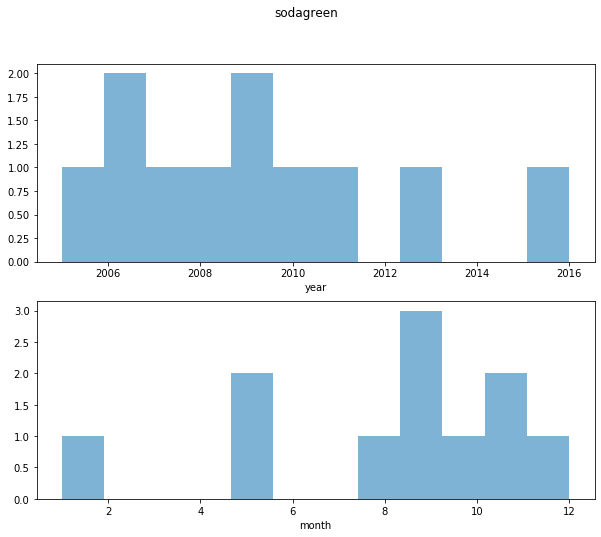

In [31]:
plot_0(sodagreen_unique)

In [32]:
#Sodagreen usually release the albums after August. The release peak occurs between 2006 and 2010. At most 2 albums are released in a year

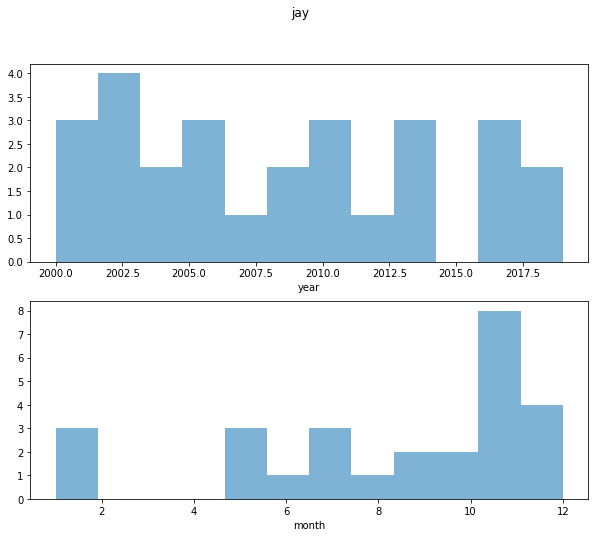

In [33]:
plot_0(jay_unique)

In [34]:
#jay chou usually relase his albums between October to December, which is at the end of year. Also, the release year peak occurs between 2000 and 2005. At most four albums are released in a year. (These albums can be true albums or albums from the live concerts.)

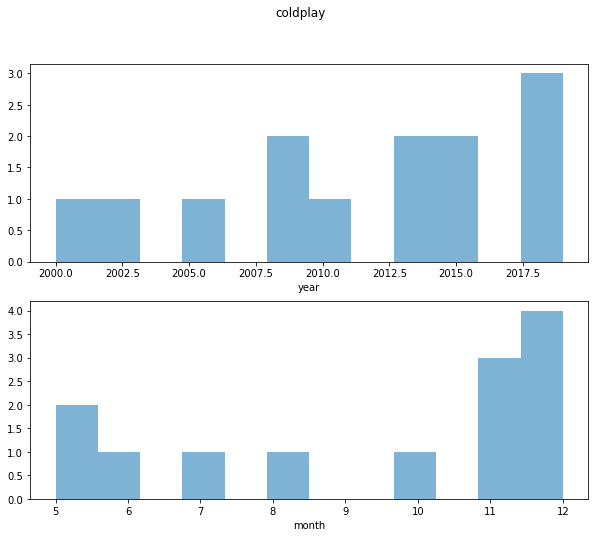

In [35]:
plot_0(coldplay_unique)

In [36]:
#coldplay usually release the albums after October, with at most three albums released in a year. 

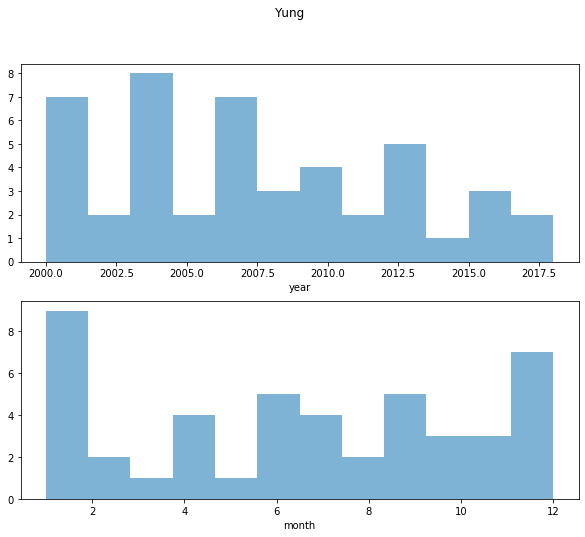

In [37]:
plot_0(yung_unique)

In [38]:
#Joey Yung usually release the albums between June(6) to Feb(2),with release peak year occurs between 2002 and 2005. At most 8 albums can be released in a year.

In [39]:
len(yung["track_name"].unique().tolist())

551

In [40]:
len(sodagreen["album_market"].unique().tolist())
len(jay["album_market"].unique().tolist())
len(coldplay["album_market"].unique().tolist())
len(yung["album_market"].unique().tolist())

1

3

16

4

In [41]:
coldplay.groupby(["album_name","album_market","album_release_date"])["album_uri"].nunique().reset_index(name = "count").sort_values("count", ascending = False).head(5)

,album_name,album_market,album_release_date,count
3,Everyday Life,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,C...",2019-11-22,2
4,Everyday Life,JP,2019-11-22,2
0,A Head Full of Dreams,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,C...",2015-12-04,1
13,Viva La Vida (Prospekt's March Edition),"AD,AE,AL,AR,BG,BH,BO,BR,BY,CL,CO,CR,CY,CZ,DO,E...",2008-11-24,1
22,Viva La Vida or Death and All His Friends,"MY,PH,TH,VN",2008-05-26,1


In [43]:
coldplay[(coldplay["album_name"] == "Everyday Life")&(coldplay["album_release_date"] == "2019-11-22")&(coldplay["album_market"] == 'AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,CL,CO,CR,CY,CZ,DE,DK,DO,DZ,EC,EE,EG,ES,FI,FR,GB,GR,GT,HK,HN,HR,HU,ID,IE,IL,IN,IS,IT,JO,KW,KZ,LB,LI,LT,LU,LV,MA,MC,MD,ME,MK,MT,MX,MY,NI,NL,NO,NZ,OM,PA,PE,PH,PL,PS,PT,PY,QA,RO,RS,RU,SA,SE,SG,SI,SK,SV,TH,TN,TR,TW,UA,US,UY,VN,XK,ZA')].sort_values("track_name").head(3)

,artist_name,artist_uri,album_name,album_uri,album_market,album_release_date,total_tracks,album_type,track_name,track_uri,track_number,duration_ms,track_market,popularity,track_type,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month,day,duration_min
56,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,Everyday Life,spotify:album:4dBp8rzdqH9unSndGk6g6o,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,C...",2019-11-22,16,album,Arabesque,spotify:track:1yQhKMf4RKZYv9xDtY2HYT,7,340280,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,C...",29,track,0.402,0.837,7,-7.734,1,0.0550,0.000117,0.851,0.373,0.165,172.023,4,2019,11,22,5.671333
23,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,Everyday Life,spotify:album:2FeyIYDDAQqcOJKOKhvHdr,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,C...",2019-11-22,16,album,Arabesque,spotify:track:0ZlVUhjO8c0bOx1D2Btznf,7,340280,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,C...",62,track,0.400,0.835,7,-7.728,1,0.0549,0.000117,0.846,0.373,0.167,172.007,4,2019,11,22,5.671333
20,Coldplay,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,Everyday Life,spotify:album:2FeyIYDDAQqcOJKOKhvHdr,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,C...",2019-11-22,16,album,BrokEn,spotify:track:1cXXhzPnbrXjNQYbLdUJdy,4,150200,"AD,AE,AL,AR,AT,AU,BA,BE,BG,BH,BO,BR,BY,CA,CH,C...",55,track,0.550,0.271,5,-11.836,1,0.0495,0.923000,0.000,0.147,0.521,130.155,4,2019,11,22,2.503333


In [44]:
#Create a function to keep the same track with highest popularity
def clean(data):
    max_df = data.groupby(["album_name","album_market","album_release_date","track_name"]).agg({"popularity":np.max}).reset_index()
    data_final = pd.merge(max_df,data,on = ["album_name","album_market","album_release_date","track_name","popularity"],how = "left")
    return data_final

In [45]:
max_sodagreen = clean(sodagreen)
max_jay  = clean(jay)
max_coldplay = clean(coldplay)
max_yung = clean(yung)

In [46]:
max_coldplay.groupby(["album_name","track_name"])["album_market"].nunique().reset_index(name = "count").sort_values("count", ascending = False).head(5)

,album_name,track_name,count
147,Viva La Vida (Prospekt's March Edition),Life in Technicolor ii,5
155,Viva La Vida (Prospekt's March Edition),Rainy Day,5
162,Viva La Vida or Death and All His Friends,Death and All His Friends,5
161,Viva La Vida or Death and All His Friends,Cemeteries of London,5
160,Viva La Vida or Death and All His Friends,42,5


In [47]:
#Finally, using "album_name"+"album_market"+"album_release_date"+"track_name" to define a unique song track. (the track is now only different because of the different album markets (for audio features, this will not be affected/ for popularity, we could take the mean across different markets))

In [49]:
#Create a function to display the histgram plot for the specific albums or for all albums (currently for one value only, need to set for a list of values)
def viz(data,album_name,album_market):
    cols = ["duration_min","popularity","danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","time_signature"]
    sub = data.copy()
    albums = data["album_name"].unique().tolist()
    markets = data["album_market"].unique().tolist()
    if album_name in albums:
        sub = sub[sub["album_name"] == album_name]
    if album_market in markets:
        sub = sub[sub["album_market"] == album_market]
    sub_df = sub.groupby(["album_name","track_name", "track_number"]).agg({"duration_min":np.mean,
    "popularity":np.max,"danceability":np.mean,"energy":np.mean,"key":np.mean,"loudness":np.mean,
    "mode":np.mean,"speechiness":np.mean,"acousticness":np.mean,"instrumentalness":np.mean,
    "liveness":np.mean,"valence":np.mean,"tempo":np.mean,"time_signature":np.mean})
    fig, axes = plt.subplots(nrows = 4 ,ncols = 4,figsize = (10,8))
    for i in range(4):
        for j in range(4):
            if (4*i+j)<14:
                axes[i,j].hist(sub_df[cols[(4*i+j)]],color = my_color["light_blue"])
                axes[i,j].set_xlabel(cols[(4*i+j)])
    fig.suptitle(sub["artist_name"].unique()[0])
    fig.tight_layout()
    fig.delaxes(ax = axes[3,3])
    fig.delaxes(ax = axes[3,2])

In [59]:
len(max_sodagreen["track_name"].unique().tolist())
len(max_jay["track_name"].unique().tolist())
len(max_yung["track_name"].unique().tolist())

128

331

551

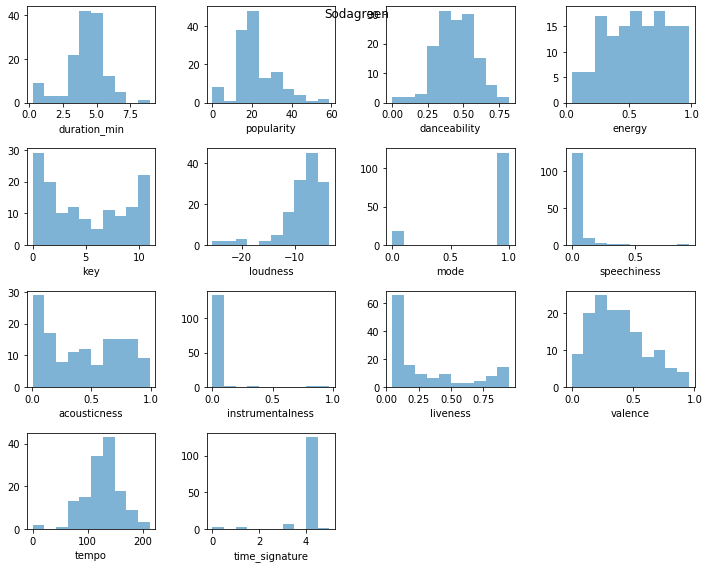

In [50]:
viz(max_sodagreen,album_name = "all",album_market = "all") #Based on 128 songs

In [52]:
#From the feature histogram above, we see that the most of their(Sodagreen) songs sounds loud but depressed.Their songs contains lots of vocal and are usually medlotic. 

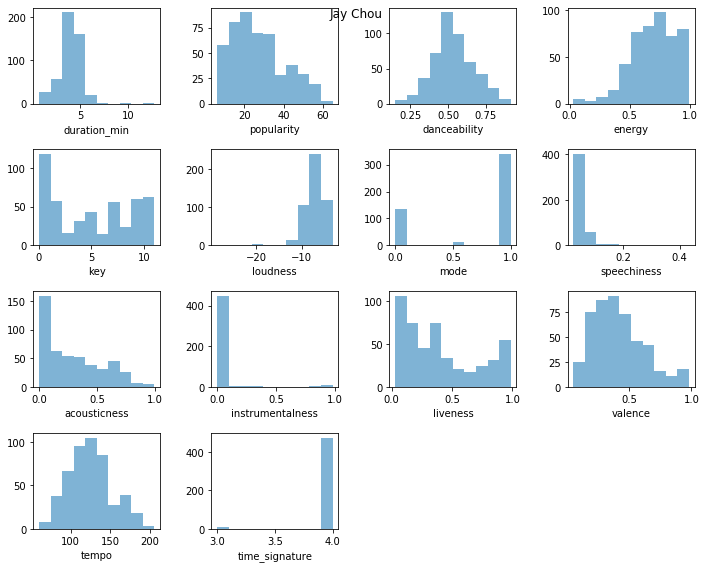

In [53]:
viz(max_jay,album_name = "all",album_market = "all") #Based on 331 songs

In [ ]:
#Comparing with sodagreen, Jay's songs seems to have lower tempo but higher engery. But most of his songs stills sounds very depressed. I think it's because most of his songs are in low tempo with lots of emotions.

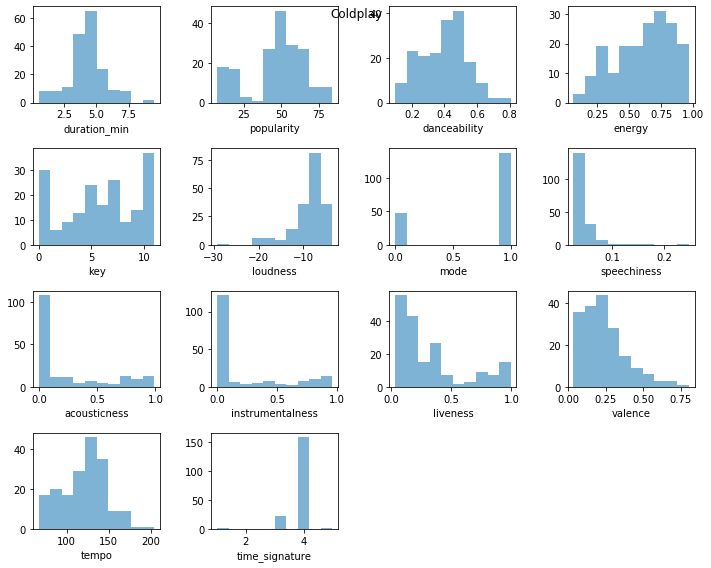

In [54]:
viz(max_coldplay,album_name = "all",album_market = "all")#Based on 551 songs

In [ ]:
#An interesting finding from Coldplay song is most of the songs are less danceable. But compared to those two chinese artists above, Coldplay's songs are a little bit more popular. Is this because most of the Chinese Users are not allowed to use Spotify in Mainland China?

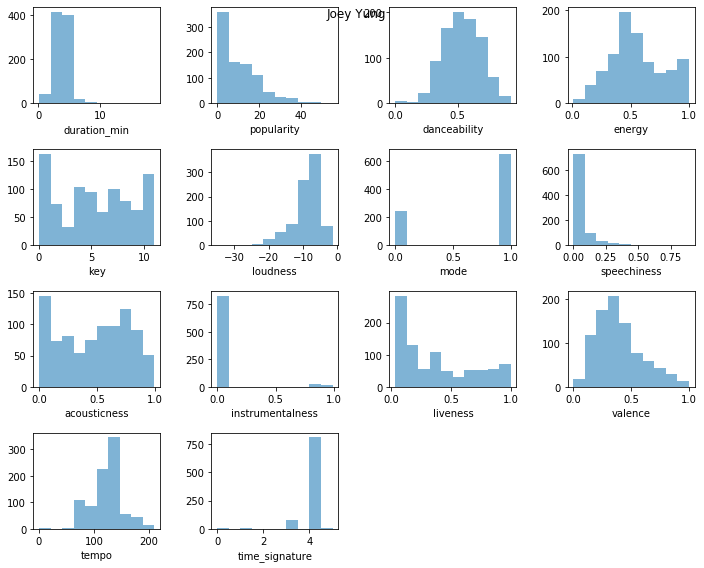

In [55]:
viz(max_yung,album_name = "all",album_market = "all")

In [ ]:
#Looks like Yung' song are less energetic than the three artits above. But they are more acoustic. It would be interesting to see of the acousticness is related to the gender or not, does the songs from female artists are more acoustic than from male artists?